# Importing all dependencies

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# import nltk
# nltk.download('stopwords')


# Loading of Data

In [10]:
%%time 
df = pd.read_csv(r'C:\Users\satya\Documents\SentimateAnalysis\DataSet\IMDB-Dataset.csv',encoding='latin-1')

Wall time: 12 s


# Data Cleaning and Preprocessing

In [11]:
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# new_stopwords = ["movie","one","film","would","shall","could","might"]
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'against', "shan't", 'themselves', "couldn't", 'are', 'haven', 'off', "wouldn't", 'will', "you're", 'ourselves', "didn't", 'her', 'further', 'only', 've', "wasn't", 'does', 'our', 'wasn', 'down', 'into', 'mightn', 'of', 'his', 'all', 'no', "weren't", 'these', 'might', 'on', 'by', 'll', 'between', "you'd", "aren't", 'needn', "needn't", 'with', 'i', 'just', 'its', "won't", 'both', 'over', "it's", "mustn't", 'few', "hasn't", 'but', 'own', 'do', 'won', 'at', "hadn't", 'he', 'or', 'when', 'whom', 'be', 'am', 'again', 'once', 'now', 'wouldn', 'a', 'as', 'during', 'what', 'same', 'for', 'this', 'been', 'should', 'having', "isn't", 'have', 'that', 'couldn', "shouldn't", 'how', 'in', "don't", 'above', 'theirs', 'we', 'from', 'your', "that'll", 'very', 'it', 'd', 'being', 'until', 'which', 'did', 's', 'himself', 'most', 'there', 'where', 'while', 're', 'any', 'don', "mightn't", 'aren', 'yourself', 'those', 'didn', 'hadn', 'too', 'other', 'out', 'if', 'ma', 'shouldn', 'could', 'below', 'itself',

In [12]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''

#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [13]:
%%time
# pd.options.display.max_colwidth = 1000
#Data cleaning
# df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df['Reviews']=df['Reviews'].apply(data_cleaning)
df['Reviews'].head(5)
# df.head(5)

Wall time: 1min 32s


0    disclaimer watched movie conditional agreement...
1    writing hopes gets put previous review film an...
2    really write scathing review turd sandwich ins...
3    saw previous spoof movies two horrible gentlem...
4    movie saw day early free still feel like got r...
Name: Reviews, dtype: object

# Data Overview

In [14]:
#Checking for missing value
df.isna().sum()

Ratings      0
Reviews      0
Movies      25
Resenhas     0
dtype: int64

In [15]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [16]:
# df['Reviews_clean'].describe()
df['Reviews'].describe()

count                                                150000
unique                                               149755
top       story soundtrack dialog graphic reasonableness...
freq                                                     10
Name: Reviews, dtype: object

In [17]:
# print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique reviews:%s' % df.Reviews.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149755
Unique movie names:14206
No of ratings:150000


# Exploratory Data Analysis

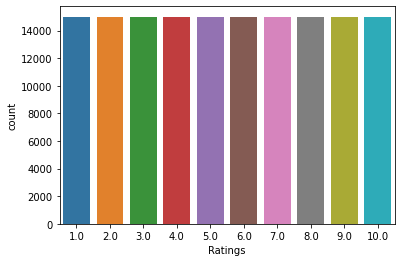

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [18]:
#Credit Madhav Mathur https://www.kaggle.com/code/madz2000/sentiment-analysis-cleaning-eda-bert-88-acc

#Checking for Class Imbalance 
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

In [19]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Wall time: 2min 10s


(-0.5, 1499.5, 799.5, -0.5)

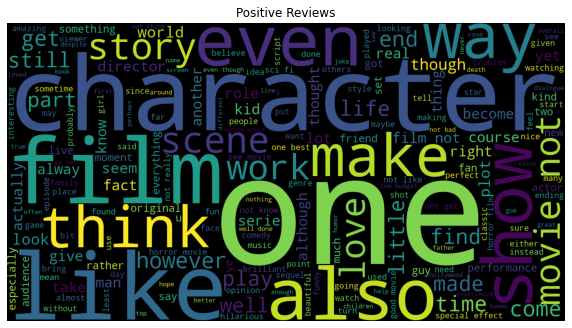

In [20]:
%%time
'''----------------------------Visualization of Important Words from Positive Reviews--------------------'''
# sentences=df['Reviews_clean']
sentences=df['Reviews']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')


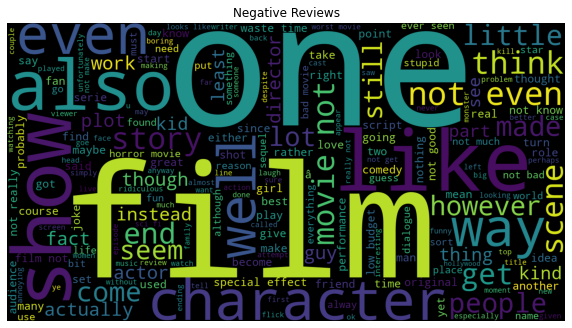

Wall time: 2min 6s


In [21]:
%%time
'''----------------------------Visualization of Important Words from Negative Reviews--------------------'''

neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

# Basic Statistic of Review data

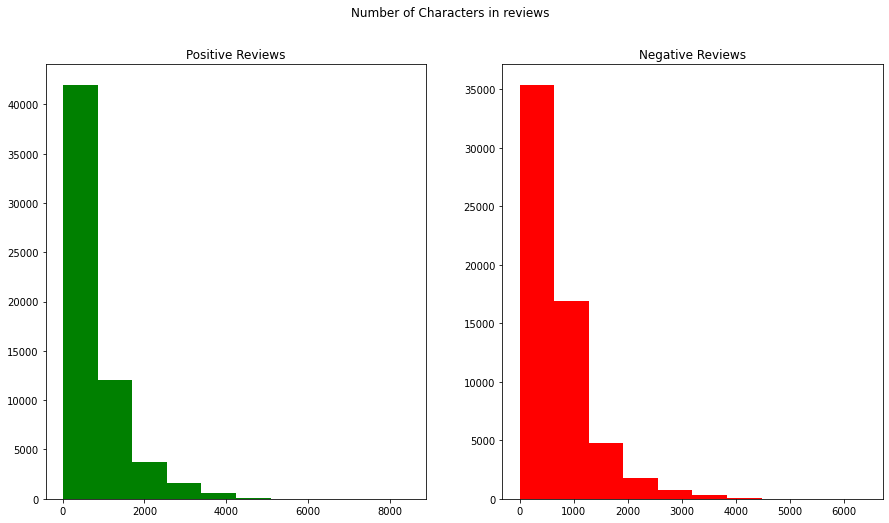

In [22]:
#Visulaization of number of charactor in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
# len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
len_pos_review=df[df['Ratings']>=7]['Reviews'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
# len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
len_neg_review=df[df['Ratings']<=4]['Reviews'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

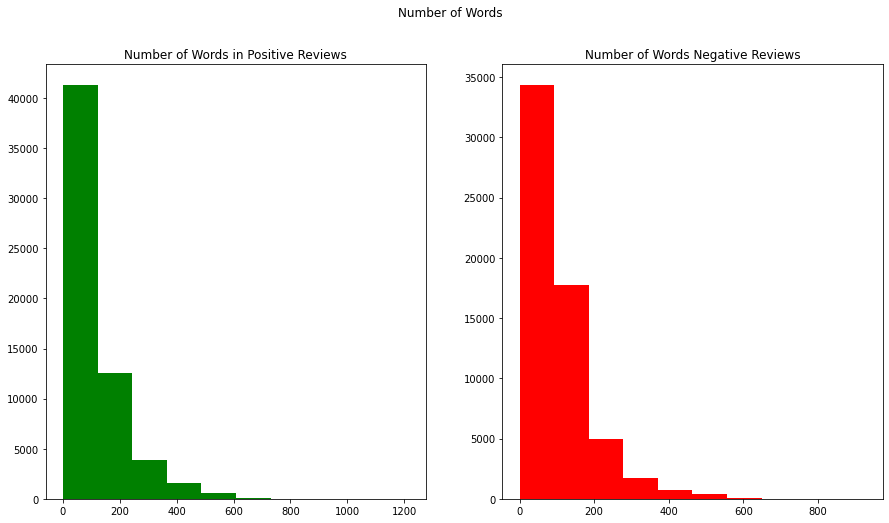

In [24]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

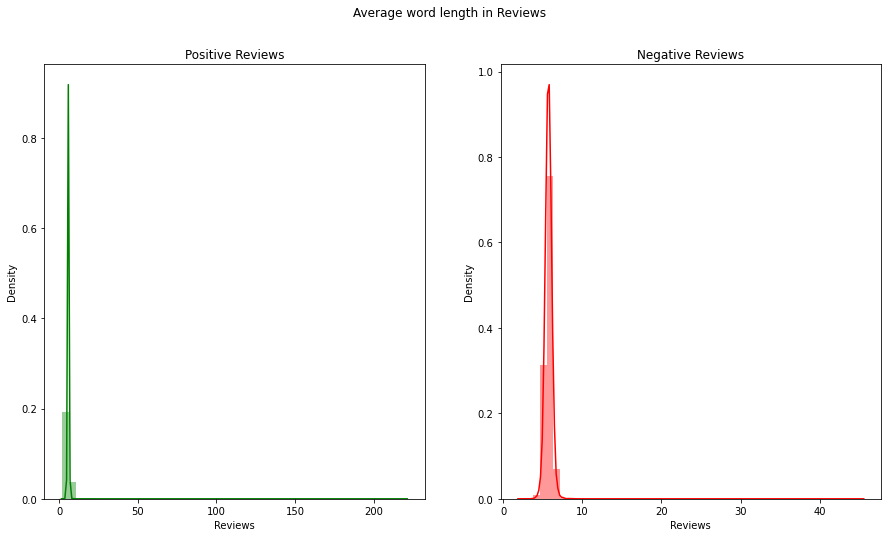

In [25]:
#Visulaize average of words in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

In [28]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [32]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [34]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,3)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [38]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head(30)

,Reviews,Ratings,Movies
90015,honest not watch movie initially bad reviews professional reviewers yesterday got dvd thought not watch least minutes really surprised enjoyed fist minutes decided watch entire movie honest blast not bad movie reviews suggest not know reviewers not like movie anyhow lets talk story story fine screenplay good dialogues situations okay laughed almost every gag saif role mental guy superb stole show character ram kapoor roles good felt ritesh not get excellent lines deliver got movies like masti dhamaal girls small roles nothing much wonder made serious actor like bipasha type movie anyhow feel sajid khan good job people watch movie reviewers not taste like humshakals better story gags compared sajid previous movies enjoy good laugh cheers,7.0,Humshakals
90041,stars bill oberst jr rich goteri written directed jason hull digress abit critiqued video vhs elves starred dan haggerty santa vs nazi xmas elves watched every christmas till tape broke krampus given us new viewing tradition next annual ritual not want spoilers santa krampus along demon actually well told script cop naughty list grew lots violence cool deaths oxymoron statement winter equals snow locale adds lots look film makings cult film build better poster maybe push great soundtrack,7.0,Krampus: The Christmas Devil
90042,way vampire begins around turn century england abraham van helsing rhett giles immortal assembled gang vampire slayers not scooby gang like buffy first minutes gang slaughtered van helsing decapitates dracula dracula gang left temporary chaos prince replace sebastien andreas beckett mistaken van helsing eligible member gang unfortunately left sebastien wife sebastien turned vampire van helsing earning bacon opening credits roll propelled present van helsing moved los angeles try jumpstart film career naturally sebastien current gang guess kind chaos ensue first whoever sound mix film dvd general matter looking another job pronto even raw sound bad adr done seems like case easily cleaned competent sound engineer turn music get rid horrendous echo scenes filmed large concrete room compensate actors whispering mumbling surround sound mix horrible stereo mix horrible even commentary track sounds like recorded large empty bathroom took least one solid point film screw equalizer crank sy...,7.0,Way of the Vampire
90058,rapsittie street kids believe santa definitely hard sell animation bogus music weird story times incoherent hand taken whole plot charming characters fun well acted strange animation works create fascinating world resounding message film found title believe santa not exactly profound approach perspective experience christmas uniquely comforting cgi realm rapsittie street kids understood primarily feeling anything else anything like dream christmas hard movie say anything largely going details seems bit like missing point supposed say grandmother talks funny bullies rude toilet junkyard cool point breaking movie either enjoy cohesive whole not like enjoy quiet cg spaces movie bound enjoy not may join ranks hecklers found another reason appreciate movie either way worth visit rapsittie street kids ville whatever,7.0,Rapsittie Street Kids: Believe in Santa
90074,yes famous director horror b movies must back certainly style subtract four marks not like ed wood movies story idea fine takes undead arrive regular robin hood editing disjointed places worse toward end photography good little post production colour work get shot audio wise voice dubbing poor music reasonable though little blown places special effects low budget like everything else not knit well end film actors starting get hang costumes look realistic weeks real wear tear however must run money not really end action stops couple scenes stitched not give satisfactory conclusion director said making pantomime lets really ham gone lot better,7.0,Robin Hood: Ghosts of Sherwood
90088,reason many people not like film unusual absent staple qualities movies must l

In [39]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,4)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [40]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,5)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [41]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews'].str.contains("bad review"))].head(30)

,Reviews,Ratings,Movies
120047,not call greatest movie ever made not anywhere near bad reviewers made average rating stars fair harsh totally undeserved ring terror feels like episode twilight zone stretched hour fact much like tv show one wonders not originally created pilot fan horror suspense series like thriller veil one step beyond tales tomorrow alfred hitchcock presents likely find pleasant way spend hour normally give film stars others panning unmercifully giving,9.0,Ring of Terror
120211,movie blast little guys loved every minute read bad reviews not disagree movie pure good enough action keep kids interested not much leave theater bouncing walls either funny jokes everyone appreciate think people gotten used much violence adult content kids movies disappointed missing like movie not entertaining enough parents well news flash kids movie perfect one kids need kinds movies not spongebob like entertain parents,9.0,Doogal
120238,huge horror buff prefer pieces delve characters psychological issues film awesome many levels acting writing fantastic creepy afraid empathetic murderer whole time interesting study line sick danger others line mean girl psychotic set great location house full creepy art winter conneticut amazing performances many favorite actresses actually shocks others given bad review loved movie guess goes show everyone different opinion say not miss film,9.0,#Horror
120239,idea many bad reviews loved thought advanced thoughtful film graphic killer comparison video game culture young girl culture spot film makes connections never seen big screen see every day life casting spot hello year old girls supposed little annoying wish directors take color consideration way film highly stylized sets make murder scenes believable everything unbelievable live not get film social media accelerationism duh someone explain,9.0,#Horror
120273,get cross love story star wars blade runner back future mtv love story fun movie entire family fantasy epic proportions much much better ai similar sci fi classic thrills non stop blockbuster lead car chase bike racing stunts vantage point moving roller coaster speeding hover craft edge seat beginning end version saw partially english still glued screen not wait see version subtitles mega budget special effects world highly convincing future vision xbox hilarious complaining long movie simply not understand bollywood three hours went quickly seemed hour better twist darth vader character example suspected revealed darth vader really hero grown old bitter battling younger self traveled forward time nothing like happened version saw three hours maybe movie edited bit since version reviewers talking version saw brilliantly edited fast paced throughout not understand many people giving magnificent achievement bad review maybe people turned innocent movie butterflies fluttering around t...,9.0,Love Story 2050
120334,not understand negative reviews movie deserve stars something definitely wrong people not care positive message movie movie beyond great touch everything shows happen person influence change lives young boys hope not see promising future streets knew course not relate fair person try understand viewpoint not raised bad neighborhood streets still totally get movie life sacrifices many lessons movie based real life many young people reality however fate made entrance young boys life brought someone made believe whether dance art not true artistic creative minds get art dance comes many forms not know see stereotypical movie not think exploited movie reviews voicing opinion wrong point making not understand mindset stayed stuck parts little boys kids street dancing people giving bad reviews using half brain consider upbringing good positive element opportunity make productive get positive frame mind greatest thing course part not realistic folks clearly missing point movie great posit...,9.0,Battlefield America
120408,watch movie cool movie enough stuff one think coming horror mov

In [42]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("blah blah blah| la la la la| mario mario mario mario"))].head(30)

,Reviews,Ratings,Movies
571,well not sure language film made put babel fish typical line translated blah blah blah blah blah blah blah blah de blah actually makes sense lines actors uttering effects wise spotted left props voyage bottom sea think giant squids fish men best line cigar smoking middle aged man year old world become place boys like grow fast looks least god sake film makes previous syfy effort savage planet alien killer bears look like masterpiece great going guys,1.0,War of the Worlds 2: The Next Wave
1070,not worst show even call internet not worry not kind guy bashes kids making videos usually actually good work done adults maybe voices different not watch one videos immediately hate lucas infamous maker fred plays not care personal life anything want need tell got subscribed tube months end not deserve badge not mind k actor let explain fred video nutshell blah blah blah blah blah g judy ha not funny blah blah blah pointless yelling wow look kevin blah blah blah mom comes home says something unfunny blah blah blah subscribe person wasted time gave partial deafness ears high pitching easily done audacity original audio replaced synced worst videos tube clear effort whatsoever thinks daily situations one really cares acts crazy annoying well stupid high pitched voice guarantee regret watching videos nobody ever met likes fred word,1.0,Fred
1220,many people seem watching false misconception going impression connected popular universal remake mummy sequels spin offs not case film nothing films shared cast crew common story elements not even common studio producing effort literally nothing films commonly referred mockbuster low budget film studio specializing low budget productions attempts capitalize success much larger profitable studio films making look like films deceptive tactics like using similar titles similar advertisements poster designs etc please know film creators way connected affiliated previous mummy movie way felt important get way mockbuster trend growing problem world home entertainment thanks companies like asylum specialize almost exclusively making rip mockbusters least past decade caused increasing amount confusion consumers movie fans also note another important fact mummy resurrected bad not able make sit start finish cheap lazily constructed filled flimsy scares ludicrous amounts padding dreadfully ...,1.0,The Mummy Resurrected
2838,zombie movie corny made sense also slow jokes hours long dialogue cut slow one worst movies ever seen far mostly never read ratings decide movie bad not one cases bad horribly stupid disgusting waist time past makeup horrible porno zombie movie acting worst ever seen year old better wow still disgusted horribly bad movie blah blah blah reminded old kid neighborhood making movie friends seriously bad maybe year olds better,1.0,Dead Life
3534,truly horrid movie maybe worth watching instant modern camp classic notice submit bad reviews site bad movies hobby sorts one thinks learn film bad movies good ones thuth every film student thesis written battlefield earth not wonder thinking amazed many people incompetent movie get released defies comprehension budget well ok capable servicable better term actors outfit fail miseraby amazing film ways sucks combines elements horrid film employs characters not develop way not care even root act irrational excessively stupid ways purpose lengthening film serving plot worst part idea movie boring abrasive time like repeatedly stabbed still place sleep awake not really care anything crawl beginning well constant screen wipes complete rip star wars hesitate even mention film review worse yet script spends third film playing things already know crawl aliens whatever took earth killed humans ones still live living mostly tribal cultures still subjected quite lot discovering going told mo...,1.0,Battlefield Earth
3869,pretty much permanent fixture imdb bottom list lawnmower man beyond cyberspace not widely considered one worst sequ

In [43]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,1)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon unigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [44]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,2)
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [45]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,3)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],50,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [46]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,4)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],50,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [47]:
# most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,5)
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],50,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [50]:
pd.options.display.max_colwidth = 1000
# df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("good|great"))].head(100)
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("good|great"))].head(100)

,Reviews,Ratings,Movies
3,saw previous spoof movies two horrible gentlemen know already bad tell truth want watch brainless person ironically meant stereotypical teenagers not laugh bit judge even little movie automatically fails never ask comes two men remember good old hollywood days whenever making movie showing people type art also story kept edge seat well whenever word hit making films earned loads cash greedy people came picture quite pathetic two exception still movie artists notably genius christopher nolan two guys well writing big words let put simple terms guys guys suck not artists instead money craving whores latest movie proves even movie fails easily mind blowing mean nothing funny trailer people usually put best stuff like idiots sometimes knew going bad made bet friends not good idea write movie reviews paper tell everyone whats good whats bad friends flipped review well warning least not even called movie nothing artistic original jokes sorry references made throughout pretty much random ...,1.0,Disaster Movie
6,given free ticket film not complain ripped except minutes life irretrievably stolen sort movies date movie epic movie meet spartans not funny time disaster movie reached new low not one real laugh anywhere film alleged jokes actually painful considerable amount childish mean spirited stuff form racist sexist especially homophobic garbage present along ample helpings juvenile gross outs none actors even bothering put pretense acting nothing hip clever even mildly intelligent going entire film beginning end crass vulgar irrational utterly humorless human sense know past sort trash made enough money keep seltzer et al grinding disaster movie may downfall franchise utter contempt seltzer collaborators audience finally beginning show clearly one fails saw almost empty theater good chance seltzer go back drawing board stop making lazy catastrophes finally develop real sense humor movie unfunny piece puke stay away,1.0,Disaster Movie
7,ok disastrous not imaginative barb movie not shred wit movie saw movie free friend said pissed pants trailer free passes think incontinent spoof disaster movies fun not couple disaster movies get referenced not really spoofed instead spoofing recent movies genres aspects current pop culture current women wrestling head commercials anything good minute running time get minutes nicole parker seems like good good material,1.0,Disaster Movie
11,decided go see movie friends laugh hoping bad become funny awful cant take kid seriously also movie confirmed knew jb ego even bigger kayne west entire movie like look talented singer good person simply nothing not movie forgot mention mommies fat cigar smoking managers made jb puppet movie make look better buried deeper starting think done purpose fat cats want get rid not recommend,1.0,Justin Bieber: Never Say Never
12,right everyone imdb pretty much committed giving movie call get bottom list trust right went see knew way criticize movie without seeing however film lacks artistic merit whatsoever full latest greatest pop sensations youtube generation names flashy lights stuffing cooked turkey show heart presentation message never give dreams however whole movie bieber smiling looking pretty grooming lesbian hair mentioned previous reviews theater full tween girls screaming heads every time inhaled exhaled someone really needs teach modern generation cinema etiquette least tell shut seconds honestly not know movie trying besides earn money add accolades stars names short movie pointless also sucks,1.0,Justin Bieber: Never Say Never
...,...,...,...
238,remember young child acquainted internet learning lawrence kasanoff foodfight film seemed unlike anything ever heard combining dozens popular advertising mascots mr clean chester cheetah mrs buttersworth charlie tuna one film resemble toy story setting transferred supermarket story film actually one cinema animation baffling stories film time development hell still captivates whenever scour

In [51]:
pd.options.display.max_colwidth = 1000
# df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("saturday night friday"))].head(100)
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("saturday night friday"))].head(100)

,Reviews,Ratings,Movies
7055,star rating saturday night friday night friday morning sunday night monday morning stars end days made tv biopic pop icon britney spears natasha bassett starting breakthrough single baby one time shoved limelight pushy mother lynne nicole oliver domineering manager larry rudolph peter benson naively thought old mature enough handle massive media exposure pushed lie virginity keep illusion trials turbulence relationships justin timberlake nathan keyes kevin federline clayton chitty revealing documentary aired sometimes something give really bad vibe yet still feel utterly compelled see instinct tell looks really bad see end bad reviews almost write review even seen still still interested subject matter see never massive fan music something britney spears always captivated kept attention icon popular culture though never gotten feeling comfortable status dramatisation life inevitable never something thought happy said definitely case popular name britney big studio quite willingly th...,1.0,Britney Ever After
17427,star rating saturday night friday night friday morning sunday night monday morningwill joey pollairi new guy high school stands prime target bullies soon makes friends jay zach pearlman simon bubba lewis neil mark l young three social misfits not complete dorks far coolest kids school either always spurs brit something home grown becomes success imagine probably anyone small country not centre world not anymore anyway sad thing sign times way tell massive success americans go remake fact almost inevitable inevitably whole lot worse best way describe inbetweeners usa imagine read really great stephen king novel see film adaptation like read lamer really like everything already seen british version done american actors not even half bloody well cultural slang changes becomes evident painful bus turds showcases desperate sorry insincere mess whole thing add insult injury performers not even look like british counter parts overweight jay hippie like neil simon resembling jonas brothers...,2.0,The Inbetweeners
17818,star rating saturday night friday night friday morning sunday night monday morning premise behind abysmal action thriller group people going good old bit paint ball find really fighting stay alive barrage real bullets fired characters never developed explored way impossible care needless say air tension suspense whatsoever acting bad none life anyway though running around shouting screaming incoherently gives life not anything special see anyway usual generic stereotypes typical genre yet another film not learned modern trend shaking camera around darkening lens putting annoying one rather endearing one one flee round,2.0,Paintball
18138,star rating saturday night friday night friday morning sunday night monday morning go great pains write long depth review last seven hard write much summary right opening sequence one lead characters wondering around deserted london shouting anybody like aforementioned film feels like pale imitation hurts fact almost director knew practically copying scene scene gave bothering tell sort decent story goes motions post apocalyptic thriller genre usual stereo typical set characters without firmly establishing back story behind majority humanity wiped making sense baffling danny dyer role sort blood crazed zombie type character probably mysterious thing whole uninspired mess,2.0,The Last Seven
18458,star rating saturday night friday night friday morning sunday night monday morning send taken films middle aged irish hero come world working cia everything around ex wife daughter cherry seems going away albanian gangsters hatch plot put explosive devices local puppies including beloved pushed far swears bring bigger fan taken franchise ultra low budget misfire sending able relate little better enjoyed maybe little big gamble begs retrospective question script potential first place bigger studio not snap pulls gross juvenile stops never seen anything unfunn